In [2]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
from nltk.tokenize import word_tokenize
# importing
import os
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /home/pawan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data = pd.read_csv("/home/pawan/Questionnaire_new_version.csv")

In [4]:
data

,Documents,file_name,Text,Ground_Truth
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',..."
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '..."
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung'
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'"
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung'
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung'


In [5]:
data['Text'][0]

'"Die Hochschule, an der Sie im Dezember 2018 zur Promotion registriert waren, hat ebenfalls Interesse daran, mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden, möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung – Ihr Einverständnis vorausgesetzt – weiter geben. Ja, ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein, ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember 2018 waren Sie an Ihrer Hochschule offiziell als Doktorand(in) registriert. In der Zwischenzeit kann sich daran etwas geändert haben.  Bitte geben Sie an, was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiz

In [6]:
import pickle
with open('KeyBert/Data_KeyBert_new.pkl', 'rb') as f:
    data_list = pickle.load(f)

In [11]:
len(data_list['Text_Sentences'][0])

503

In [4]:
data = pd.read_csv("/home/pawan/Questionnaire_new_version.csv")

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau","ca", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
878


In [5]:
data

,Documents,file_name,Text,Ground_Truth
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',..."
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '..."
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung'
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'"
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung'
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung'


The dataset contains 19 text files each containing theri ground truth keywords

In [6]:
data['Text'][0]

'"Die Hochschule, an der Sie im Dezember 2018 zur Promotion registriert waren, hat ebenfalls Interesse daran, mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden, möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung – Ihr Einverständnis vorausgesetzt – weiter geben. Ja, ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein, ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember 2018 waren Sie an Ihrer Hochschule offiziell als Doktorand(in) registriert. In der Zwischenzeit kann sich daran etwas geändert haben.  Bitte geben Sie an, was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiz

In general, text data is noisy, whether it be in the form of symbols or stopwords and punctuation. The text must therefore be cleaned up in order to gain greater insights as well as to make it easier to grasp.

In [7]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [8]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [9]:
data["clean_text"][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren . Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben . Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden . Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden . Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert . In der Zwischenzeit kann sich daran etwas geändert haben . Bitte geben Sie an was aktuell auf Sie zutrifft . Ich promoviere . Ich habe das Promotionsverfahren abgeschlossen . Ich habe mein Promotionsvorhaben unterbrochen . Ich habe mein Promotionsvorhaben abgebrochen . Handelt es sich um eine offiziell der Hoch

In [10]:
Preprocesed_text = []
for i in range(len(data["clean_text"])):
    Preprocesed_text.append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["clean_text"][i])) 

In [11]:
Preprocesed_text[0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben. Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert. In der Zwischenzeit kann sich daran etwas geändert haben. Bitte geben Sie an was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiziell der Hochschule geme

In [12]:
import re
test_text = []
for i in range(len(Preprocesed_text)):
    test_text.append(re.sub(r'\.+ ', ".",  Preprocesed_text[i]))

In [13]:
test_text[0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren.Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben.Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden.Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden.Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert.In der Zwischenzeit kann sich daran etwas geändert haben.Bitte geben Sie an was aktuell auf Sie zutrifft.Ich promoviere.Ich habe das Promotionsverfahren abgeschlossen.Ich habe mein Promotionsvorhaben unterbrochen.Ich habe mein Promotionsvorhaben abgebrochen.Handelt es sich um eine offiziell der Hochschule gemeldete Unter

In [14]:
cleaned_text = []
for i in range(len(test_text)):
    for line in test_text[i].split('\n'):
        # Replace multiple dots with space
        line = re.sub('\.\.+', '.', line) 
        # Remove single dots
        cleaned_text.append(re.sub('\.', '.', line))

In [19]:
cleaned_text[16]

'Werden Sie im Sommersemester nach dem BAföG gefördert.nein ich habe keinen Antrag gestellt.nein mein aktueller Antrag wurde endgültig abgelehnt.über meinen Antrag bzw.Widerspruch ist noch nicht entschieden.ja.Haben Sie während Ihres Studiums früher schon einmal einen Antrag auf BAföG gestellt.nein.ja ich habe einmal einen Antrag gestellt der wurde aber abgelehnt.ja in früheren Semestern wurde ich auch gefördert ein Antrag auf Weiterförderung wurde dann aber abgelehnt.ja in früheren Semestern wurde ich auch gefördert habe dann aber keinen Antrag auf Weiterförderung mehr gestellt.Haben Sie während Ihres Studiums früher schon einmal einen Antrag auf BAföG gestellt.nein.ja ich habe bereits früher einen Antrag gestellt der wurde aber abgelehnt.ja in früheren Semestern wurde ich auch gefördert.Wird das BAföG unabhängig vom Einkommen Ihrer Eltern gewährt.nein.ja.In welcher Form erhalten Sie BAföG.jeweils zur Hälfte als Zuschuss und zinsloses Staatsdarlehen.als Zuschuss bei über die Förderhöc

In [20]:
final_cleaned_text = []
for i in range(len(cleaned_text)):
    final_cleaned_text.append(re.sub(r"\.(?=\S)", ". ", cleaned_text[i]))

In [23]:
final_cleaned_text[0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben. Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert. In der Zwischenzeit kann sich daran etwas geändert haben. Bitte geben Sie an was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiziell der Hochschule geme

In [29]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(final_cleaned_text)
data
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())

# df_dtm.index=final_cleaned_text.index
# df_dtm.head(3)

In [30]:
df_dtm

,aachen,aalen,ab,abbrechen,abbruch,abchasien,abendessen,abendgymnasium,abendkurse,aber,...,überstunden,überweisung,überwiegend,überzeu,überzeugungen,üblich,üblichen,übt,übten,übungen
0,0,0,0,0,1,0,0,0,0,5,...,0,0,1,0,0,1,1,2,1,0
1,0,0,1,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,2,...,0,0,0,0,0,1,0,0,0,1
3,0,0,30,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,4,...,1,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,2,0,0,0,5,...,1,0,0,0,0,1,2,0,0,0
8,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
9,12,2,4,0,0,0,1,0,0,3,...,0,3,1,0,0,0,0,1,8,0


In [21]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(final_cleaned_text))

In [23]:
data_words[0]

['die',
 'hochschule',
 'an',
 'der',
 'sie',
 'im',
 'dezember',
 'zur',
 'promotion',
 'registriert',
 'waren',
 'hat',
 'ebenfalls',
 'interesse',
 'daran',
 'mehr',
 'uber',
 'die',
 'ihrer',
 'promovierenden',
 'zu',
 'erfahren',
 'um',
 'zu',
 'vermeiden',
 'mochten',
 'wir',
 'die',
 'von',
 'ihnen',
 'innerhalb',
 'dieses',
 'fragebogens',
 'angegebenen',
 'antworten',
 'an',
 'ihre',
 'hochschule',
 'zum',
 'zweck',
 'der',
 'und',
 'evaluation',
 'im',
 'bereich',
 'der',
 'ihr',
 'einverstandnis',
 'vorausgesetzt',
 'weiter',
 'geben',
 'ja',
 'ich',
 'bin',
 'mit',
 'der',
 'weitergabe',
 'meiner',
 'angaben',
 'an',
 'die',
 'hochschule',
 'einverstanden',
 'nein',
 'ich',
 'bin',
 'mit',
 'der',
 'weitergabe',
 'meiner',
 'angaben',
 'an',
 'die',
 'hochschule',
 'nicht',
 'einverstanden',
 'anfang',
 'dezember',
 'waren',
 'sie',
 'an',
 'ihrer',
 'hochschule',
 'offiziell',
 'als',
 'doktorand',
 'in',
 'registriert',
 'in',
 'der',
 'zwischenzeit',
 'kann',
 'sich',
 '

In [24]:
import spacy
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('de_core_news_lg', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [119]:
data_lemmatized[0]

/usr/local/lib/python3.7/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'hochschule dezember promotion registrieren ebenfalls interesse daran mehr uber promovierend erfahren vermeiden fragebogens angegeben antworten hochschule zweck evaluation bereich einverstandnis voraussetzen weit geben ja weitergabe angaben hochschule einverstanden weitergabe angaben hochschule einverstanden anfang dezember hochschule offiziell doktorand registrieren zwischenzeit daran geandert geben aktuell zutreffen promovieren abschließen unterbrechen abbrechen handeln offiziell hochschule gemeldet unterbrechung ja noch erinnern welch quartal arbeiten beginnen noch erinnern quartal zulassen quartal quartal quartal quartal hochschule daruber informieren promotion abbrechen ja noch erinnern welch quartal promotion abbrechen quartal quartal quartal quartal hochschule ausland beteiligen ja handeln dabei gemeinsam abschluss hochschulen ausland ja fachhochschule hochschule angewandte wissenschaften beteiligen letzt jahren universitat saarlandes uds beschaftigte tatig ja attraktiv bewerten

In [120]:
# # # run this cell to save the results.

# import pickle 
# with open('lemmatized_data.pkl', 'wb') as f:
#     pickle.dump(data_lemmatized, f)

/usr/local/lib/python3.7/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words=stop_words,             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             #max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

/usr/local/lib/python3.7/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/pawan/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ben', 'ber', 'berhaupt', 'brigens', 'chst', 'chte', 'chten', 'daf', 'dar', 'demgegen', 'demgem', 'derma', 'erdem', 'ernst', 'gen', 'glich', 'gro', 'hrend', 'hrenddem', 'hrenddessen', 'nat', 'nfte', 'nften', 'nfter', 'nftes', 'nnen', 'nnt', 'nnte', 'ordnung', 'rde', 'rden', 'rfen', 'rft', 'rlich', 'schluss', 'sseldorf', 'ssen', 'sst', 'ter', 'tte', 'tten', 'uft', 'zun'] not in stop_words.
  % sorted(inconsistent)


In [28]:
data_vectorized[0]

/usr/local/lib/python3.7/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<1x136 sparse matrix of type '<class 'numpy.int64'>'
	with 121 stored elements in Compressed Sparse Row format>

In [114]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=19,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = None,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=19,
                          random_state=100)


/usr/local/lib/python3.7/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1)}

In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/pawan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
from nltk.tokenize import word_tokenize
tokenized_sents =[]
for i in range(len(final_cleaned_text)):
    tokenized_sents.append(word_tokenize(final_cleaned_text[i]) )

In [85]:
test = tokenized_sents[0]

In [86]:
test

['Die',
 'Hochschule',
 'an',
 'der',
 'Sie',
 'im',
 'Dezember',
 'zur',
 'Promotion',
 'registriert',
 'waren',
 'hat',
 'ebenfalls',
 'Interesse',
 'daran',
 'mehr',
 'über',
 'die',
 'Promotionsbedingungen',
 'ihrer',
 'Promovierenden',
 'zu',
 'erfahren',
 '.',
 'Um',
 'Doppelbefragungen',
 'zu',
 'vermeiden',
 'möchten',
 'wir',
 'die',
 'von',
 'Ihnen',
 'innerhalb',
 'dieses',
 'Fragebogens',
 'angegebenen',
 'Antworten',
 'an',
 'Ihre',
 'Hochschule',
 'zum',
 'Zweck',
 'der',
 'Qualitätssicherung',
 'und',
 'Evaluation',
 'im',
 'Bereich',
 'der',
 'Doktorandenausbildung',
 'Ihr',
 'Einverständnis',
 'vorausgesetzt',
 'weiter',
 'geben',
 '.',
 'Ja',
 'ich',
 'bin',
 'mit',
 'der',
 'Weitergabe',
 'meiner',
 'Angaben',
 'an',
 'die',
 'Hochschule',
 'einverstanden',
 '.',
 'Nein',
 'ich',
 'bin',
 'mit',
 'der',
 'Weitergabe',
 'meiner',
 'Angaben',
 'an',
 'die',
 'Hochschule',
 'nicht',
 'einverstanden',
 '.',
 'Anfang',
 'Dezember',
 'waren',
 'Sie',
 'an',
 'Ihrer',
 'Hoc

Now, let’s create the bag of words model using gensim

In [90]:
import gensim
dic=gensim.corpora.Dictionary(tokenized_sents[0])

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [62]:
!pip install nltk seaborn sklearn gensim pyldavis

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 42.9 MB/s eta 0:00:00
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=4845653a68162acc5a944c44e1c575a3dbc228e2f80f0b3b13047a8ef457d076
  Stored in directory: /home/pawan/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
--- Logging error ---
Traceback (most recent call last):
  File "/home/pawan/.local/lib/python3.7/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderab

In [58]:
sentence_number = 1
for sentence in final_cleaned_text[0]:
    if not sentence.isspace():
        print("Sentence {} contains {} characters".format(sentence_number, count(sentence)))
        sentence_number += sentence_number

NameError: name 'count' is not defined

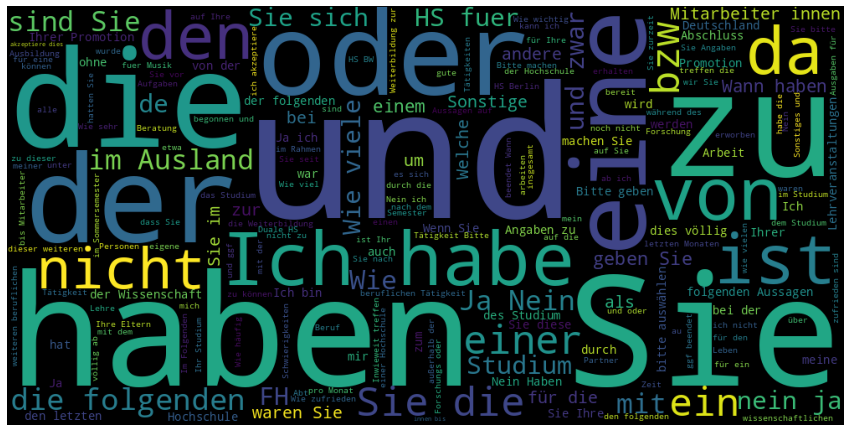

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(final_cleaned_text)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()